# 1. Methylation

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Mounted at /content/drive


In [109]:
import os
os.listdir("/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025")

['RNA_Seq_transcriptom_meta_data.csv',
 'methylation_data.csv',
 'methylation_data_meta.csv',
 'rna_seq_meta.csv',
 'rna_seq_expr.csv',
 'proteomics_data_meta.csv',
 'proteomics_data.csv',
 'processed_data',
 'proteom_processed_data.csv',
 'methylation_processed_data.csv',
 'mirna_data.csv',
 'mirna_meta.csv',
 'miran_preprocessd.csv',
 'proteomics_processed_data.csv',
 'rna_processed_data.csv']

In [ ]:
meth = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/methylation_data.csv"
meth_meta = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/methylation_data_meta.csv"

In [ ]:
meth_df = pd.read_csv(meth)
meth_meta_df = pd.read_csv(meth_meta)

In [ ]:
meth_df.shape, meth_meta_df.shape

((119853, 476), (475, 31))

In [ ]:
meth_df.head()

,Unnamed: 0,TCGA-D3-A1Q5-06A-11D-A19B-05,TCGA-EE-A2GU-06A-11D-A19B-05,TCGA-EE-A29X-06A-11D-A19B-05,TCGA-EB-A1NK-01A-11D-A19B-05,TCGA-GF-A2C7-01A-11D-A19C-05,TCGA-FR-A8YD-06A-11D-A373-05,TCGA-D3-A2JL-06A-11D-A19B-05,TCGA-EE-A3JI-06A-11D-A21B-05,TCGA-FS-A1ZE-06A-11D-A19C-05,...,TCGA-EE-A3AC-06A-11D-A19B-05,TCGA-D3-A1QB-06A-11D-A19D-05,TCGA-EB-A550-01A-61D-A27L-05,TCGA-D9-A6EG-06A-12D-A32S-05,TCGA-EB-A44O-01A-11D-A25S-05,TCGA-RP-A690-06A-11D-A30Z-05,TCGA-EE-A29H-06A-12D-A19C-05,TCGA-EB-A44Q-06A-11D-A25S-05,TCGA-EB-A3XE-01A-12D-A23D-05,TCGA-ER-A19T-06A-11D-A19D-05
0,cg16619049,0.051550,0.413800,0.685133,0.280455,0.111672,0.277309,0.382790,0.891458,0.043956,...,0.324192,0.385325,0.351065,0.112432,0.196277,0.244896,0.278559,0.341959,0.341881,0.551034
1,cg18147296,0.706144,0.826661,0.658807,0.472715,0.415556,0.766575,0.509625,0.794910,0.813884,...,0.522931,0.735372,0.617894,0.849584,0.730269,0.923431,0.426500,0.699907,0.737956,0.648348
2,cg13938959,0.718709,0.801524,0.563237,0.404367,0.916525,0.835401,0.381386,0.829706,0.367208,...,0.339329,0.659876,0.334356,0.917213,0.238067,0.916314,0.348700,0.395418,0.555460,0.836201
3,cg12445832,0.406887,0.655307,0.349309,0.231782,0.816928,0.736616,0.257500,0.687068,0.101962,...,0.177142,0.341468,0.264174,0.873994,0.113819,0.881807,0.218245,0.297156,0.392432,0.723447
4,cg23999112,0.691858,0.887773,0.753252,0.488698,0.903782,0.842471,0.589585,0.884971,0.495358,...,0.327269,0.705845,0.566170,0.918790,0.261518,0.883046,0.364017,0.562528,0.600259,0.902022


In [ ]:
df_meth = meth_df.set_index("Unnamed: 0")

In [ ]:
df_meth.shape

(119853, 475)

In [ ]:
df_meth = df_meth.T
df_meth.shape

(475, 119853)

In [ ]:
df_meth.shape

(475, 119853)

## Add Sample type in the meth dataframe

In [ ]:
meth_meta_df["sample_type"]

,sample_type
0,Metastatic
1,Metastatic
2,Metastatic
3,Primary Tumor
4,Primary Tumor
...,...
470,Metastatic
471,Metastatic
472,Metastatic
473,Primary Tumor


In [ ]:
meth_meta_df["sample_type"].shape

(475,)

In [ ]:
type(meth_meta_df["sample_type"].to_numpy())

numpy.ndarray

In [ ]:
df_meth["Sample_type"] = meth_meta_df["sample_type"].to_numpy()
df_meth.shape

(475, 119854)

In [ ]:
df_meth.head()

Unnamed: 0,cg16619049,cg18147296,cg13938959,cg12445832,cg23999112,cg08128007,cg01097950,cg04364728,cg05151709,cg08546707,...,cg00618396,cg24194941,cg23214992,cg09231482,cg00547789,cg10512285,cg26540943,cg01747155,cg09975171,Sample_type
TCGA-D3-A1Q5-06A-11D-A19B-05,0.051550,0.706144,0.718709,0.406887,0.691858,0.524282,0.639921,0.108183,0.233207,0.251609,...,0.044096,0.067361,0.020633,0.070259,0.039242,0.052455,0.012953,0.026067,0.046371,Metastatic
TCGA-EE-A2GU-06A-11D-A19B-05,0.413800,0.826661,0.801524,0.655307,0.887773,0.502059,0.784425,0.625759,0.671773,0.783711,...,0.351339,0.410216,0.411519,0.631697,0.629846,0.483779,0.262030,0.370279,0.391581,Metastatic
TCGA-EE-A29X-06A-11D-A19B-05,0.685133,0.658807,0.563237,0.349309,0.753252,0.715716,0.709655,0.599074,0.571000,0.623474,...,0.258904,0.450405,0.324125,0.450962,0.434083,0.363803,0.378473,0.262183,0.301864,Metastatic
TCGA-EB-A1NK-01A-11D-A19B-05,0.280455,0.472715,0.404367,0.231782,0.488698,0.547806,0.549192,0.268345,0.383252,0.438138,...,0.044379,0.053461,0.022440,0.119818,0.038200,0.063055,0.014549,0.023815,0.117956,Primary Tumor
TCGA-GF-A2C7-01A-11D-A19C-05,0.111672,0.415556,0.916525,0.816928,0.903782,0.443097,0.861504,0.738397,0.809348,0.871783,...,0.051562,0.051040,0.018280,0.331167,0.130455,0.096430,0.012192,0.027983,0.197631,Primary Tumor


## Subset Methylatoin Dataset

Select only
* Metastatic
* Primary Tumor

In [ ]:
df_meth["Sample_type"].value_counts()

,count
Sample_type,
Metastatic,368
Primary Tumor,104
Solid Tissue Normal,2
Additional Metastatic,1


In [ ]:
df_meth2 = df_meth[df_meth['Sample_type'].isin(['Metastatic', 'Primary Tumor'])]
df_meth2.shape
# idx

(472, 119854)

### Label Encoding

In [15]:
labels = {
    "Metastatic": 1,
    "Primary Tumor": 0
}

In [ ]:

df_meth2["Sample_type"] = df_meth2["Sample_type"].map(labels)
df_meth2.head()

<ipython-input-49-4b34317768a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meth2["Sample_type"] = df_meth2["Sample_type"].map(labels)


Unnamed: 0,cg16619049,cg18147296,cg13938959,cg12445832,cg23999112,cg08128007,cg01097950,cg04364728,cg05151709,cg08546707,...,cg00618396,cg24194941,cg23214992,cg09231482,cg00547789,cg10512285,cg26540943,cg01747155,cg09975171,Sample_type
TCGA-D3-A1Q5-06A-11D-A19B-05,0.051550,0.706144,0.718709,0.406887,0.691858,0.524282,0.639921,0.108183,0.233207,0.251609,...,0.044096,0.067361,0.020633,0.070259,0.039242,0.052455,0.012953,0.026067,0.046371,1
TCGA-EE-A2GU-06A-11D-A19B-05,0.413800,0.826661,0.801524,0.655307,0.887773,0.502059,0.784425,0.625759,0.671773,0.783711,...,0.351339,0.410216,0.411519,0.631697,0.629846,0.483779,0.262030,0.370279,0.391581,1
TCGA-EE-A29X-06A-11D-A19B-05,0.685133,0.658807,0.563237,0.349309,0.753252,0.715716,0.709655,0.599074,0.571000,0.623474,...,0.258904,0.450405,0.324125,0.450962,0.434083,0.363803,0.378473,0.262183,0.301864,1
TCGA-EB-A1NK-01A-11D-A19B-05,0.280455,0.472715,0.404367,0.231782,0.488698,0.547806,0.549192,0.268345,0.383252,0.438138,...,0.044379,0.053461,0.022440,0.119818,0.038200,0.063055,0.014549,0.023815,0.117956,0
TCGA-GF-A2C7-01A-11D-A19C-05,0.111672,0.415556,0.916525,0.816928,0.903782,0.443097,0.861504,0.738397,0.809348,0.871783,...,0.051562,0.051040,0.018280,0.331167,0.130455,0.096430,0.012192,0.027983,0.197631,0


### Seperate X and Y

In [ ]:
X= df_meth2.drop("Sample_type", axis = 1)
y = df_meth2["Sample_type"]
y.head()

,Sample_type
TCGA-D3-A1Q5-06A-11D-A19B-05,1
TCGA-EE-A2GU-06A-11D-A19B-05,1
TCGA-EE-A29X-06A-11D-A19B-05,1
TCGA-EB-A1NK-01A-11D-A19B-05,0
TCGA-GF-A2C7-01A-11D-A19C-05,0


### Plot NaNs

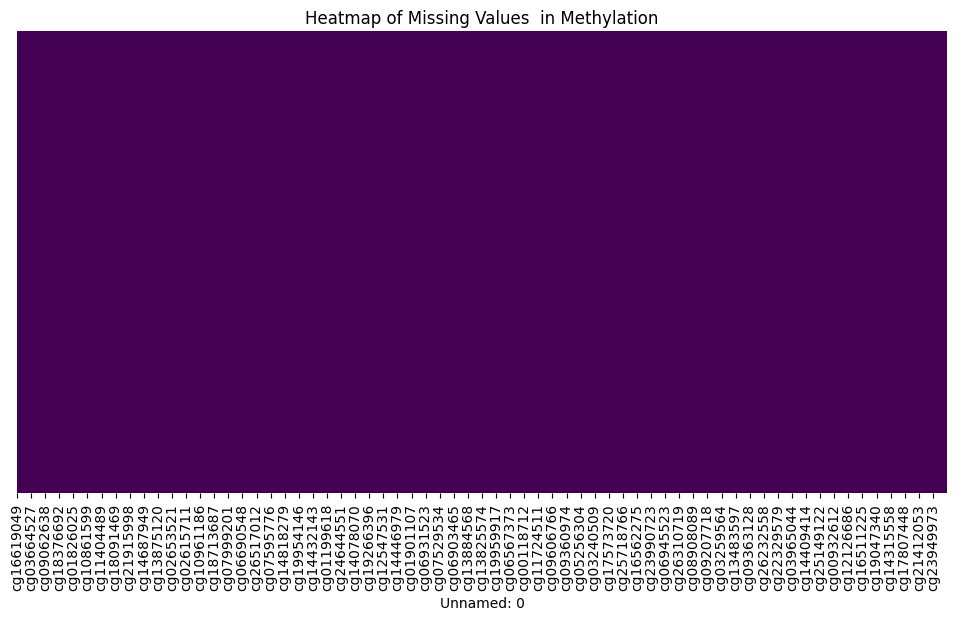

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of NaN values
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(df_meth.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values  in Methylation")
plt.show()


In [ ]:
df_meth.isna().sum().sum()

0

# AutoEncoder

In [57]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torch.optim as optim

In [ ]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
X_norm[:5], y[:5]

(array([[0.02519482, 0.72326999, 0.71949467, ..., 0.00664454, 0.01136981,
         0.01144273],
        [0.4062298 , 0.87675703, 0.82069435, ..., 0.38672459, 0.49979979,
         0.43118575],
        [0.69163367, 0.66298311, 0.52950745, ..., 0.56441138, 0.34641414,
         0.32209805],
        [0.26597009, 0.42598257, 0.33536918, ..., 0.00907861, 0.00817473,
         0.09848373],
        [0.08843517, 0.35318671, 0.96122619, ..., 0.00548223, 0.01408989,
         0.19536049]]),
 TCGA-D3-A1Q5-06A-11D-A19B-05    1
 TCGA-EE-A2GU-06A-11D-A19B-05    1
 TCGA-EE-A29X-06A-11D-A19B-05    1
 TCGA-EB-A1NK-01A-11D-A19B-05    0
 TCGA-GF-A2C7-01A-11D-A19C-05    0
 Name: Sample_type, dtype: int64)

In [ ]:
X_tensor = torch.FloatTensor(X_norm)
y_tensor = torch.LongTensor(y.to_numpy())

In [ ]:
# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [58]:
# --------------------------
# 2. Autoencoder for Feature Selection
# --------------------------
"""
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent
"""
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),  # Normalize activations
            nn.Dropout(0.3),  # Drop 30% of activations

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),  # Drop 20% of activations

            nn.Linear(256, latent_dim),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),

            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),

            nn.Linear(512, input_dim),
            nn.Sigmoid()  # Use Sigmoid if input features are normalized (e.g., [0,1])
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent


In [ ]:
# Hyperparameters
input_dim = X_tensor.shape[1]
latent_dim = 1000 # Bottleneck layer (selected features)
lr = 0.01
epochs = 10

# Initialize model, loss, optimizer
autoencoder = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

In [ ]:
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=119853, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=1000, bias=True)
    (9): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=512, out_features=119853, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
# Train Autoencoder
autoencoder.train()
for epoch in range(epochs):
    for batch_X, _ in train_loader:  # Unsupervised (no labels needed)
        optimizer.zero_grad()
        reconstructed, latent = autoencoder(batch_X)
        loss = criterion(reconstructed, batch_X)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0671
Epoch [2/10], Loss: 0.0527
Epoch [3/10], Loss: 0.0421
Epoch [4/10], Loss: 0.0375
Epoch [5/10], Loss: 0.0408
Epoch [6/10], Loss: 0.0385
Epoch [7/10], Loss: 0.0326
Epoch [8/10], Loss: 0.0367
Epoch [9/10], Loss: 0.0385
Epoch [10/10], Loss: 0.0325


In [ ]:
# Extract latent features (selected features)
autoencoder.eval()
with torch.no_grad():
    X_latent = autoencoder.encoder(X_tensor)
    # X_test_latent = autoencoder.encoder(X_test_tensor)

In [ ]:
X_latent.shape #, X_test_latent.shape

torch.Size([472, 1000])

In [ ]:
df4 = pd.DataFrame(X_latent)
df4["Sample_type"] = y_tensor
df4.shape

(472, 1001)

In [ ]:
df4.to_csv("/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/methylation_processed_data.csv", index = False)

# 2. miRNA

## Data Load and Preparation

In [ ]:
mirna_file = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/mirna_data.csv"
mirna_file_meta = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/mirna_meta.csv"
df_mirna = pd.read_csv(mirna_file)
df_mirna_meta = pd.read_csv(mirna_file_meta)

In [ ]:
df_mirna.head()

,Unnamed: 0,miRNA_ID,read_count_TCGA-D3-A1Q5-06A-11R-A18W-13,read_count_TCGA-EE-A2GU-06A-11R-A18W-13,read_count_TCGA-EE-A29X-06A-11R-A18W-13,read_count_TCGA-EB-A1NK-01A-11R-A18W-13,read_count_TCGA-GF-A2C7-01A-11R-A18W-13,read_count_TCGA-FR-A8YD-06A-11R-A37G-13,read_count_TCGA-D3-A2JL-06A-11R-A18V-13,read_count_TCGA-EE-A3JI-06A-11R-A21E-13,...,read_count_TCGA-EE-A3AC-06A-11R-A18V-13,read_count_TCGA-D3-A1QB-06A-11R-A18W-13,read_count_TCGA-EB-A550-01A-61R-A27U-13,read_count_TCGA-EB-A44O-01A-11R-A25Z-13,read_count_TCGA-RP-A690-06A-11R-A310-13,read_count_TCGA-EE-A29H-06A-12R-A18V-13,read_count_TCGA-EB-A44Q-06A-11R-A25Z-13,read_count_TCGA-EB-A3XE-01A-12R-A23A-13,read_count_TCGA-FR-A69P-06A-21R-A310-13,read_count_TCGA-ER-A19T-01A-11R-A18W-13
0,1,hsa-let-7a-1,77785,36504,51082,45387,93907,18755,95972,182997,...,186524,35968,59205,22757,69189,84635,41587,100783,21301,121704
1,2,hsa-let-7a-2,78508,36801,50872,45784,94238,18694,95773,181204,...,186579,36244,58877,22996,68831,84904,40861,100920,21085,120917
2,3,hsa-let-7a-3,79297,36671,51542,45858,94932,18894,96356,182294,...,187775,36708,59955,23262,68797,84416,41228,101491,21354,121308
3,4,hsa-let-7b,108740,21122,56550,34916,60692,13562,32372,181528,...,15092,22813,128162,90928,32506,50894,29127,142802,22773,72013
4,5,hsa-let-7c,32608,171,1219,5264,6460,4889,9979,1398,...,6458,1248,9007,3689,8982,774,12334,7502,3620,10295


In [ ]:
df_mirna2 = df_mirna.set_index("miRNA_ID")
df_mirna2.head()

,Unnamed: 0,read_count_TCGA-D3-A1Q5-06A-11R-A18W-13,read_count_TCGA-EE-A2GU-06A-11R-A18W-13,read_count_TCGA-EE-A29X-06A-11R-A18W-13,read_count_TCGA-EB-A1NK-01A-11R-A18W-13,read_count_TCGA-GF-A2C7-01A-11R-A18W-13,read_count_TCGA-FR-A8YD-06A-11R-A37G-13,read_count_TCGA-D3-A2JL-06A-11R-A18V-13,read_count_TCGA-EE-A3JI-06A-11R-A21E-13,read_count_TCGA-FS-A1ZE-06A-11R-A18W-13,...,read_count_TCGA-EE-A3AC-06A-11R-A18V-13,read_count_TCGA-D3-A1QB-06A-11R-A18W-13,read_count_TCGA-EB-A550-01A-61R-A27U-13,read_count_TCGA-EB-A44O-01A-11R-A25Z-13,read_count_TCGA-RP-A690-06A-11R-A310-13,read_count_TCGA-EE-A29H-06A-12R-A18V-13,read_count_TCGA-EB-A44Q-06A-11R-A25Z-13,read_count_TCGA-EB-A3XE-01A-12R-A23A-13,read_count_TCGA-FR-A69P-06A-21R-A310-13,read_count_TCGA-ER-A19T-01A-11R-A18W-13
miRNA_ID,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-1,1,77785,36504,51082,45387,93907,18755,95972,182997,22446,...,186524,35968,59205,22757,69189,84635,41587,100783,21301,121704
hsa-let-7a-2,2,78508,36801,50872,45784,94238,18694,95773,181204,22446,...,186579,36244,58877,22996,68831,84904,40861,100920,21085,120917
hsa-let-7a-3,3,79297,36671,51542,45858,94932,18894,96356,182294,22339,...,187775,36708,59955,23262,68797,84416,41228,101491,21354,121308
hsa-let-7b,4,108740,21122,56550,34916,60692,13562,32372,181528,28777,...,15092,22813,128162,90928,32506,50894,29127,142802,22773,72013
hsa-let-7c,5,32608,171,1219,5264,6460,4889,9979,1398,2428,...,6458,1248,9007,3689,8982,774,12334,7502,3620,10295


In [ ]:
df_mirna2.shape, df_mirna_meta.shape

((1881, 453), (452, 30))

In [ ]:
df_mirna2.drop("Unnamed: 0", axis = 1, inplace = True)
df_mirna2.shape

(1881, 452)

In [ ]:
df_mirna = df_mirna2.T
df_mirna.shape

(452, 1881)

## Merge with Meta data

In [ ]:
df_mirna_meta["sample_type"].value_counts()

,count
sample_type,
Metastatic,352
Primary Tumor,97
Solid Tissue Normal,2
Additional Metastatic,1


In [ ]:
df_mirna["Sample_type"] = df_mirna_meta["sample_type"].to_numpy()
df_mirna.head(3)

miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Sample_type
read_count_TCGA-D3-A1Q5-06A-11R-A18W-13,77785,78508,79297,108740,32608,5415,38013,12911,13315,3498,...,43,1,12,40,0,10,672,6375,1644368,Metastatic
read_count_TCGA-EE-A2GU-06A-11R-A18W-13,36504,36801,36671,21122,171,7292,2327,20684,20710,2299,...,87,0,3,3,0,5,221,32,115136,Metastatic
read_count_TCGA-EE-A29X-06A-11R-A18W-13,51082,50872,51542,56550,1219,2251,4708,35788,36828,3225,...,37,0,0,6,0,1,996,38,92546,Metastatic


In [ ]:
df_mirna.shape

(452, 1882)

### Drop first row for batch

In [ ]:
df_mirna = df_mirna.iloc[1:].reset_index(drop = True)
df_mirna.shape

(451, 1882)

### Subset MiRNa Data

Select only
* Metastatic
* Primary Tumor

In [ ]:
df_mirna3 = df_mirna[df_mirna['Sample_type'].isin(['Metastatic', 'Primary Tumor'])]

In [ ]:
df_mirna3.shape

(448, 1882)

### Label Encoding

In [ ]:
df_mirna3['Sample_type'] = df_mirna3['Sample_type'].map(labels)
df_mirna3.head()

<ipython-input-53-110289dac548>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mirna3['Sample_type'] = df_mirna3['Sample_type'].map(labels)


miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Sample_type
0,36504,36801,36671,21122,171,7292,2327,20684,20710,2299,...,87,0,3,3,0,5,221,32,115136,1
1,51082,50872,51542,56550,1219,2251,4708,35788,36828,3225,...,37,0,0,6,0,1,996,38,92546,1
2,45387,45784,45858,34916,5264,2857,5338,19808,20209,1920,...,10,0,24,3,0,0,216,271,107299,0
3,93907,94238,94932,60692,6460,11996,14122,46119,47232,7095,...,96,0,38,12,0,75,1157,880,421308,0
4,18755,18694,18894,13562,4889,979,4082,6797,6888,1108,...,6,0,1,6,0,15,74,813,109179,1


### Seperate X and Y

In [ ]:
X_mirna = df_mirna3.drop("Sample_type", axis = 1)
y_mirna = df_mirna3["Sample_type"]
y_mirna.head()

,Sample_type
0,1
1,1
2,0
3,0
4,1


## Plot Nans

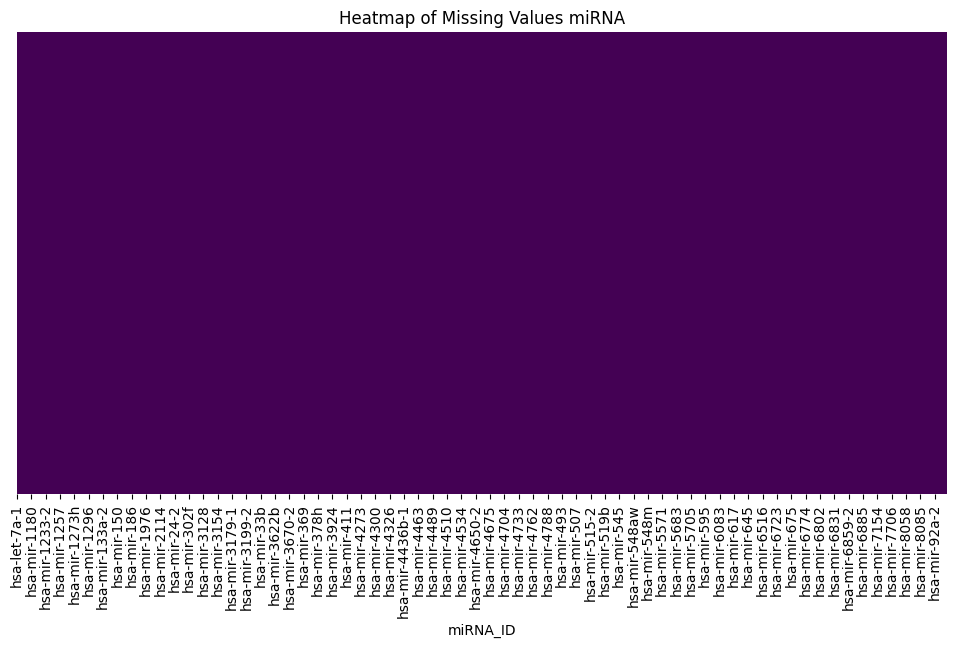

In [ ]:
# Create a heatmap of NaN values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(X_mirna.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values miRNA")
plt.show()

## Auto Encoder

In [ ]:
scaler = MinMaxScaler()
X_mirna_norm = scaler.fit_transform(X_mirna)

In [ ]:
X_mirna_norm[:2], y_mirna[:2]

(array([[0.07707049, 0.07767666, 0.07640292, ..., 0.09234948, 0.00095804,
         0.06838973],
        [0.11452037, 0.11365862, 0.11423549, ..., 0.44318696, 0.00134125,
         0.05363683]]),
 0    1
 1    1
 Name: Sample_type, dtype: int64)

### Convert to Tensor

In [ ]:
X_mirna_tensor = torch.FloatTensor(X_mirna_norm)
y_miran_tensor = torch.LongTensor(y_mirna.to_numpy())

### Data Loader

In [ ]:
# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_mirna_tensor, y_miran_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Hyperparameters
input_dim = X_mirna_tensor.shape[1]
latent_dim = 1000 # Bottleneck layer (selected features)
lr = 0.01
epochs = 10

# Initialize model, loss, optimizer
autoencoder = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

In [ ]:
input_dim

1881

In [ ]:
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1881, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=1000, bias=True)
    (9): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=512, out_features=1881, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
LOSS = []
# Train Autoencoder
autoencoder.train()
for epoch in range(epochs):
    for batch_X, _ in train_loader:  # Unsupervised (no labels needed)
        optimizer.zero_grad()
        reconstructed, latent = autoencoder(batch_X)
        loss = criterion(reconstructed, batch_X)
        LOSS.append(loss)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0094
Epoch [2/10], Loss: 0.0092
Epoch [3/10], Loss: 0.0117
Epoch [4/10], Loss: 0.0108
Epoch [5/10], Loss: 0.0091
Epoch [6/10], Loss: 0.0089
Epoch [7/10], Loss: 0.0109
Epoch [8/10], Loss: 0.0103
Epoch [9/10], Loss: 0.0116
Epoch [10/10], Loss: 0.0127


In [ ]:
# Extract latent features (selected features)
autoencoder.eval()
with torch.no_grad():
    X_latent = autoencoder.encoder(X_mirna_tensor)

In [ ]:
X_latent.shape

torch.Size([448, 1000])

In [ ]:
df_miran_latent = pd.DataFrame(X_latent)
df_miran_latent["Sample_type"] = y_miran_tensor
df_miran_latent.shape

(448, 1001)

In [ ]:
df_miran_latent.to_csv("/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/miran_preprocessd.csv", index = False)

# Proteomics

In [4]:
proteom_file = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/proteomics_data.csv"
proteom_meta = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/proteomics_data_meta.csv"
df_proteom = pd.read_csv(proteom_file)
df_protem_meta = pd.read_csv(proteom_meta)

In [5]:
df_proteom.head()

,Unnamed: 0,AGID,lab_id,catalog_number,set_id,peptide_target,TCGA-EE-A2GU-06A,TCGA-EB-A1NK-01A,TCGA-GF-A2C7-01A,TCGA-FR-A8YD-06A,...,TCGA-FS-A1ZD-06A,TCGA-D9-A3Z4-01A,TCGA-EE-A3AC-06A,TCGA-D3-A1QB-06A,TCGA-EB-A550-01A,TCGA-EB-A44O-01A,TCGA-EE-A29H-06A,TCGA-EB-A44Q-06A,TCGA-EB-A3XE-01A,TCGA-FR-A69P-06A
0,1,AGID00100,882,sc-628,Old,1433BETA,0.040815,-0.130007,-0.157510,-0.169920,...,-0.005165,0.101390,-0.072219,-0.251565,-0.086270,-0.17660,-0.048784,-0.183410,0.217110,0.077268
1,2,AGID00111,913,sc-23957,Old,1433EPSILON,-0.036961,0.009201,-0.077796,-0.032558,...,-0.094626,-0.138270,-0.249535,-0.159179,-0.013176,0.05889,-0.208790,0.049733,0.027842,-0.026712
2,3,AGID00101,883,sc-1019,Old,1433ZETA,-0.256835,0.299115,0.172840,0.183700,...,-0.098221,1.033300,0.152219,0.374830,0.187830,0.25408,0.039215,-0.064558,0.513790,-0.113430
3,4,AGID00001,2,9452,Old,4EBP1,0.724780,-0.481710,0.081027,0.572640,...,0.247225,-0.059227,0.355955,0.167575,0.164750,0.95379,0.533915,0.324000,0.045777,0.373910
4,5,AGID00002,3,9456,Old,4EBP1_pS65,-0.113876,-0.220438,0.027263,0.214610,...,-0.007997,0.068834,0.117222,0.444260,-0.073071,0.91298,0.238640,0.170540,0.398540,0.028769


In [6]:
df_proteom = df_proteom.set_index("AGID")
df_proteom.head()

,Unnamed: 0,lab_id,catalog_number,set_id,peptide_target,TCGA-EE-A2GU-06A,TCGA-EB-A1NK-01A,TCGA-GF-A2C7-01A,TCGA-FR-A8YD-06A,TCGA-HR-A5NC-01A,...,TCGA-FS-A1ZD-06A,TCGA-D9-A3Z4-01A,TCGA-EE-A3AC-06A,TCGA-D3-A1QB-06A,TCGA-EB-A550-01A,TCGA-EB-A44O-01A,TCGA-EE-A29H-06A,TCGA-EB-A44Q-06A,TCGA-EB-A3XE-01A,TCGA-FR-A69P-06A
AGID,,,,,,,,,,,,,,,,,,,,,
AGID00100,1,882,sc-628,Old,1433BETA,0.040815,-0.130007,-0.157510,-0.169920,-0.243150,...,-0.005165,0.101390,-0.072219,-0.251565,-0.086270,-0.17660,-0.048784,-0.183410,0.217110,0.077268
AGID00111,2,913,sc-23957,Old,1433EPSILON,-0.036961,0.009201,-0.077796,-0.032558,0.008079,...,-0.094626,-0.138270,-0.249535,-0.159179,-0.013176,0.05889,-0.208790,0.049733,0.027842,-0.026712
AGID00101,3,883,sc-1019,Old,1433ZETA,-0.256835,0.299115,0.172840,0.183700,-0.112070,...,-0.098221,1.033300,0.152219,0.374830,0.187830,0.25408,0.039215,-0.064558,0.513790,-0.113430
AGID00001,4,2,9452,Old,4EBP1,0.724780,-0.481710,0.081027,0.572640,0.666470,...,0.247225,-0.059227,0.355955,0.167575,0.164750,0.95379,0.533915,0.324000,0.045777,0.373910
AGID00002,5,3,9456,Old,4EBP1_pS65,-0.113876,-0.220438,0.027263,0.214610,0.235110,...,-0.007997,0.068834,0.117222,0.444260,-0.073071,0.91298,0.238640,0.170540,0.398540,0.028769


In [7]:
To_drop_columns = ["Unnamed: 0", "lab_id", "catalog_number", "set_id", "peptide_target"]
df_proteom = df_proteom.drop(To_drop_columns, axis = 1)
df_proteom.head()

,TCGA-EE-A2GU-06A,TCGA-EB-A1NK-01A,TCGA-GF-A2C7-01A,TCGA-FR-A8YD-06A,TCGA-HR-A5NC-01A,TCGA-BF-AAOX-01A,TCGA-EE-A3JH-06A,TCGA-DA-A1IA-06A,TCGA-FS-A1ZJ-06A,TCGA-D3-A3C1-06A,...,TCGA-FS-A1ZD-06A,TCGA-D9-A3Z4-01A,TCGA-EE-A3AC-06A,TCGA-D3-A1QB-06A,TCGA-EB-A550-01A,TCGA-EB-A44O-01A,TCGA-EE-A29H-06A,TCGA-EB-A44Q-06A,TCGA-EB-A3XE-01A,TCGA-FR-A69P-06A
AGID,,,,,,,,,,,,,,,,,,,,,
AGID00100,0.040815,-0.130007,-0.157510,-0.169920,-0.243150,-0.30329,0.414410,-0.333595,-0.042420,-0.064420,...,-0.005165,0.101390,-0.072219,-0.251565,-0.086270,-0.17660,-0.048784,-0.183410,0.217110,0.077268
AGID00111,-0.036961,0.009201,-0.077796,-0.032558,0.008079,-0.17676,-0.008234,-0.126943,0.024826,-0.112340,...,-0.094626,-0.138270,-0.249535,-0.159179,-0.013176,0.05889,-0.208790,0.049733,0.027842,-0.026712
AGID00101,-0.256835,0.299115,0.172840,0.183700,-0.112070,0.10385,-0.095944,-0.127330,-0.137881,-0.012770,...,-0.098221,1.033300,0.152219,0.374830,0.187830,0.25408,0.039215,-0.064558,0.513790,-0.113430
AGID00001,0.724780,-0.481710,0.081027,0.572640,0.666470,0.71041,-0.163950,0.276895,0.445510,-0.898480,...,0.247225,-0.059227,0.355955,0.167575,0.164750,0.95379,0.533915,0.324000,0.045777,0.373910
AGID00002,-0.113876,-0.220438,0.027263,0.214610,0.235110,0.88684,0.071035,0.414420,0.233610,-0.043877,...,-0.007997,0.068834,0.117222,0.444260,-0.073071,0.91298,0.238640,0.170540,0.398540,0.028769


In [9]:
df_proteom.shape

(487, 352)

In [18]:
df_proteom2 = df_proteom.T
df_proteom2.shape

(352, 487)

In [19]:
Sample_type = df_protem_meta["sample_type"]
Sample_type.head()

,sample_type
0,Metastatic
1,Primary Tumor
2,Primary Tumor
3,Metastatic
4,Primary Tumor


In [20]:
Sample_type.value_counts()

,count
sample_type,
Metastatic,261
Primary Tumor,90
Additional Metastatic,1


### Data Merging and Label Encoding

In [21]:
df_proteom2["Sample_type"] = Sample_type.to_numpy()
df_proteom2.head()

AGID,AGID00100,AGID00111,AGID00101,AGID00001,AGID00002,AGID00003,AGID00443,AGID00120,AGID00004,AGID00005,...,AGID02137,AGID00088,AGID00089,AGID00504,AGID00095,AGID02217,AGID02210,AGID00326,AGID00432,Sample_type
TCGA-EE-A2GU-06A,0.040815,-0.036961,-0.256835,0.724780,-0.113876,-1.001535,-0.050602,0.107537,-0.781645,-0.421790,...,-0.046398,-0.163130,-0.371140,0.290380,-0.140875,-0.094444,-0.023500,-0.167714,-0.360625,Metastatic
TCGA-EB-A1NK-01A,-0.130007,0.009201,0.299115,-0.481710,-0.220438,0.431590,-0.178263,-1.107675,-1.072525,-0.624815,...,-0.149921,0.276295,0.490745,0.290545,0.228921,0.558527,-0.535964,-0.846385,-0.488140,Primary Tumor
TCGA-GF-A2C7-01A,-0.157510,-0.077796,0.172840,0.081027,0.027263,0.816150,-0.103042,-0.685675,-0.072584,0.134470,...,-0.152725,-0.000019,0.232245,0.334515,0.208195,-0.109939,0.112251,-0.545835,-0.424641,Primary Tumor
TCGA-FR-A8YD-06A,-0.169920,-0.032558,0.183700,0.572640,0.214610,0.068069,0.079392,-0.371950,-0.079453,-0.512440,...,-0.047684,-0.157210,-0.408710,0.544820,-0.138510,0.392585,0.401209,-1.169215,-0.461166,Metastatic
TCGA-HR-A5NC-01A,-0.243150,0.008079,-0.112070,0.666470,0.235110,0.862310,0.340870,0.304660,-0.129060,-0.667180,...,-0.030509,-0.064461,0.290430,0.544690,0.053710,-0.087689,0.997230,-1.324046,0.010240,Primary Tumor


In [22]:
df_proteom2 = df_proteom2[df_proteom2['Sample_type'].isin(['Metastatic', 'Primary Tumor'])]
df_proteom2.shape

(351, 488)

In [23]:
df_proteom2["Sample_type"] = df_proteom2['Sample_type'].map(labels)
df_proteom2.head()

AGID,AGID00100,AGID00111,AGID00101,AGID00001,AGID00002,AGID00003,AGID00443,AGID00120,AGID00004,AGID00005,...,AGID02137,AGID00088,AGID00089,AGID00504,AGID00095,AGID02217,AGID02210,AGID00326,AGID00432,Sample_type
TCGA-EE-A2GU-06A,0.040815,-0.036961,-0.256835,0.724780,-0.113876,-1.001535,-0.050602,0.107537,-0.781645,-0.421790,...,-0.046398,-0.163130,-0.371140,0.290380,-0.140875,-0.094444,-0.023500,-0.167714,-0.360625,1
TCGA-EB-A1NK-01A,-0.130007,0.009201,0.299115,-0.481710,-0.220438,0.431590,-0.178263,-1.107675,-1.072525,-0.624815,...,-0.149921,0.276295,0.490745,0.290545,0.228921,0.558527,-0.535964,-0.846385,-0.488140,0
TCGA-GF-A2C7-01A,-0.157510,-0.077796,0.172840,0.081027,0.027263,0.816150,-0.103042,-0.685675,-0.072584,0.134470,...,-0.152725,-0.000019,0.232245,0.334515,0.208195,-0.109939,0.112251,-0.545835,-0.424641,0
TCGA-FR-A8YD-06A,-0.169920,-0.032558,0.183700,0.572640,0.214610,0.068069,0.079392,-0.371950,-0.079453,-0.512440,...,-0.047684,-0.157210,-0.408710,0.544820,-0.138510,0.392585,0.401209,-1.169215,-0.461166,1
TCGA-HR-A5NC-01A,-0.243150,0.008079,-0.112070,0.666470,0.235110,0.862310,0.340870,0.304660,-0.129060,-0.667180,...,-0.030509,-0.064461,0.290430,0.544690,0.053710,-0.087689,0.997230,-1.324046,0.010240,0


### Seperate X and Y

In [24]:
X = df_proteom2.drop("Sample_type", axis = 1)
y = df_proteom2["Sample_type"]

### Plot the missing Values

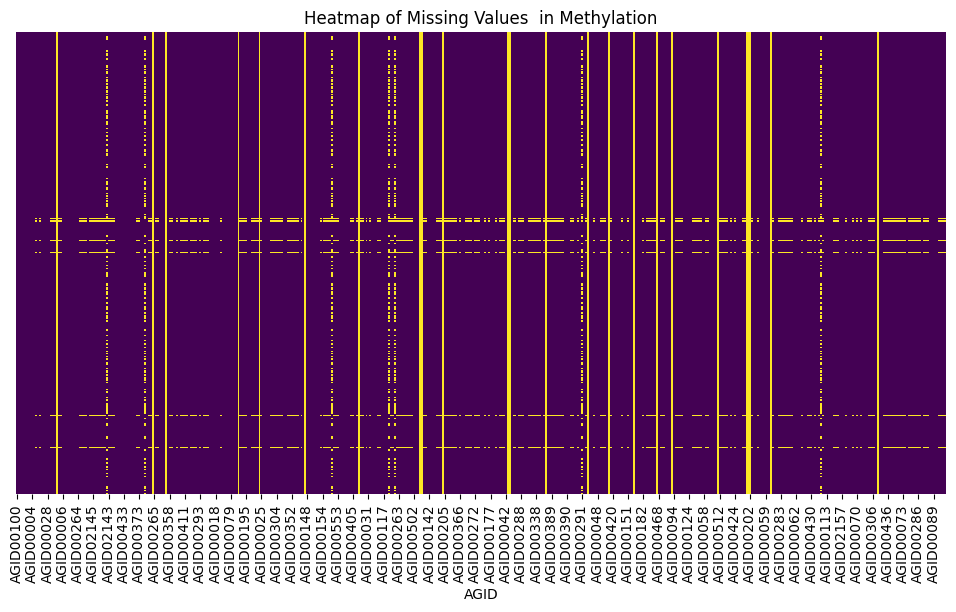

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of NaN values
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(X.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values  in Methylation")
plt.show()


In [26]:
X.isna().sum().sum()

10892

### Missing Value Imputed with Mean

In [27]:
X = X.fillna(X.mean())

In [34]:
X = X.fillna(X.mean(axis = 1))

In [35]:
X.isna().sum().sum()

8424

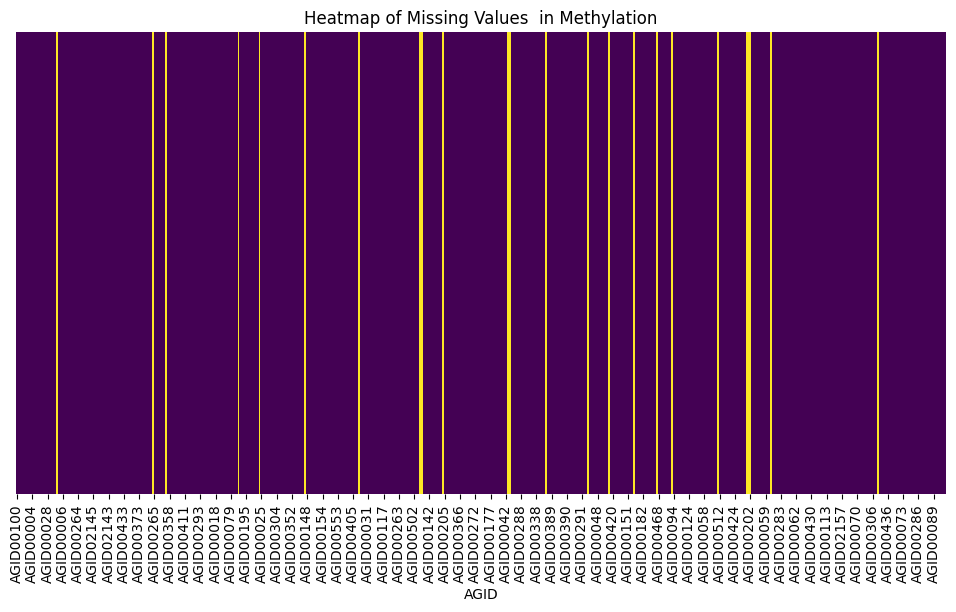

In [36]:
# Create a heatmap of NaN values
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(X.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values  in Methylation")
plt.show()


In [42]:
X.shape

(351, 487)

In [48]:
col_with_nans = X.isna().all(axis = 0)
col_with_nans.sum()

24

### Drop columns with all na

In [52]:
X2 = X.dropna(axis = 1, how = "all")

In [54]:
col_with_nans = X2.isna().all(axis = 1)
col_with_nans.sum()

0

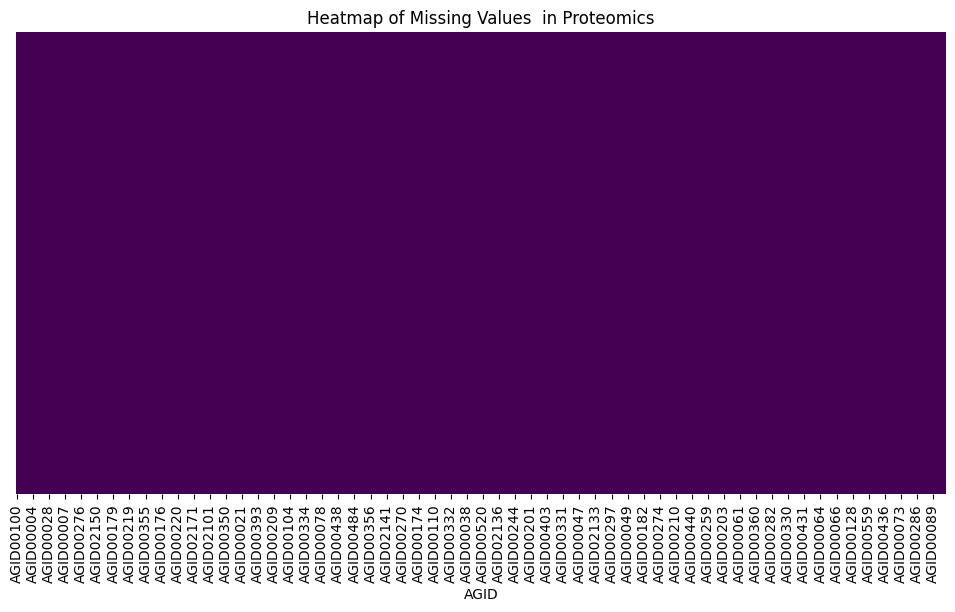

In [56]:
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(X2.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values  in Proteomics")
plt.show()


## Auto Encoder

In [59]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X2)

In [60]:
X_norm[:2], y[:2]

(array([[0.36145893, 0.42045451, 0.2397532 , 0.63806239, 0.19383575,
         0.27929507, 0.27948342, 0.61293482, 0.36687901, 0.63078201,
         0.34787302, 0.56321095, 0.33536935, 0.39794557, 0.52614054,
         0.67038865, 0.10305387, 0.14640631, 0.5467156 , 0.35787883,
         0.6981442 , 0.13544977, 0.49344419, 0.22951114, 0.66447787,
         0.29993764, 0.33541283, 0.44097948, 0.49775915, 0.30061225,
         0.22718968, 0.43199935, 0.61709777, 0.49134471, 0.48612888,
         0.54845588, 0.59413507, 0.299995  , 0.5718728 , 0.41399063,
         0.20334323, 0.38264277, 0.67886847, 0.48183655, 0.29254479,
         0.58937009, 0.59021309, 0.23866098, 0.47490987, 0.35219989,
         0.2745296 , 0.37003428, 0.3796238 , 0.68661657, 0.47753527,
         0.41898994, 0.35840802, 0.33899177, 0.54982857, 0.53078678,
         0.37925406, 0.61376846, 0.43819323, 0.17069372, 0.55537263,
         0.60586498, 0.3626852 , 0.59125166, 0.35077842, 0.53921241,
         0.45196738, 0.18477322, 0

### Converting to tensors

In [61]:
X_tensor = torch.FloatTensor(X_norm)
y_tensor = torch.LongTensor(y.to_numpy())

In [63]:
# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [64]:
# Hyperparameters
input_dim = X_tensor.shape[1]
latent_dim = 1000 # Bottleneck layer (selected features)
lr = 0.01
epochs = 10

# Initialize model, loss, optimizer
autoencoder = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

In [65]:
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=463, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=1000, bias=True)
    (9): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=512, out_features=463, bias=True)
    (7): Sigmoid()
  )
)

In [66]:
LOSS = []
# Train Autoencoder
autoencoder.train()
for epoch in range(epochs):
    for batch_X, _ in train_loader:  # Unsupervised (no labels needed)
        optimizer.zero_grad()
        reconstructed, latent = autoencoder(batch_X)
        loss = criterion(reconstructed, batch_X)
        LOSS.append(loss)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0374
Epoch [2/10], Loss: 0.0312
Epoch [3/10], Loss: 0.0270
Epoch [4/10], Loss: 0.0283
Epoch [5/10], Loss: 0.0232
Epoch [6/10], Loss: 0.0249
Epoch [7/10], Loss: 0.0206
Epoch [8/10], Loss: 0.0181
Epoch [9/10], Loss: 0.0204
Epoch [10/10], Loss: 0.0222


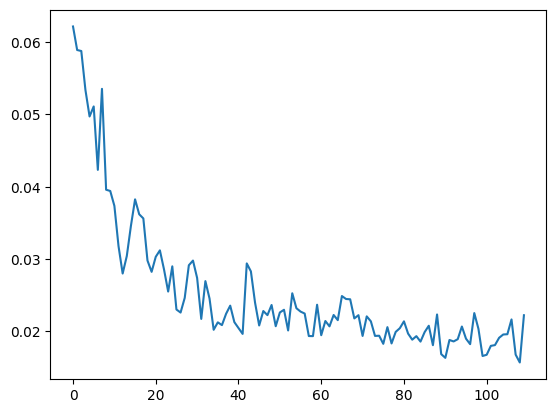

In [73]:
LOSS2 = []
for loss_tensor in LOSS:  # Assuming LOSS is a list of tensors

    loss_detached = loss_tensor.detach()
    LOSS2.append(loss_detached.numpy())

plt.plot(LOSS2)

### Encoded proteomics data

In [75]:
# Extract latent features (selected features)
autoencoder.eval()
with torch.no_grad():
    X_latent = autoencoder.encoder(X_tensor)
    # X_test_latent = autoencoder.encoder(X_test_tensor)

In [76]:
X_latent.shape

torch.Size([351, 1000])

In [77]:
df_proteom4 = pd.DataFrame(X_latent)
df_proteom4["Sample_type"] = y_tensor

In [78]:
df_proteom4.to_csv("/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/proteomics_processed_data.csv", index = False)

# RNA SEq

In [80]:
rnaseq = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/rna_seq_expr.csv"
rnaseq_meta = "/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/rna_seq_meta.csv"
df_rna = pd.read_csv(rnaseq)
df_rna_meta = pd.read_csv(rnaseq_meta)

In [81]:
df_rna.head()

,Unnamed: 0,TCGA-EE-A2GU-06A-11R-A18T-07,TCGA-EE-A29X-06A-11R-A18T-07,TCGA-EB-A1NK-01A-11R-A18T-07,TCGA-GF-A2C7-01A-11R-A18T-07,TCGA-FR-A8YD-06A-11R-A37K-07,TCGA-D3-A2JL-06A-11R-A18S-07,TCGA-EE-A3JI-06A-11R-A21D-07,TCGA-FS-A1ZE-06A-11R-A18T-07,TCGA-HR-A5NC-01A-11R-A27Q-07,...,TCGA-EE-A3AC-06A-11R-A18S-07,TCGA-D3-A1QB-06A-11R-A18T-07,TCGA-EB-A550-01A-61R-A27Q-07,TCGA-D9-A6EG-06A-12R-A32P-07,TCGA-EB-A44O-01A-11R-A266-07,TCGA-RP-A690-06A-11R-A311-07,TCGA-EE-A29H-06A-12R-A18S-07,TCGA-EB-A44Q-06A-11R-A266-07,TCGA-EB-A3XE-01A-12R-A239-07,TCGA-ER-A19T-06A-11R-A18U-07
0,ENSG00000000003.15,2800,1956,2490,2985,1661,2565,35,881,3120,...,2258,2507,1839,2209,1351,2711,1468,1376,1794,115
1,ENSG00000000005.6,1,0,0,1,1,0,2,17,0,...,0,4,0,0,0,0,1,0,2,1
2,ENSG00000000419.13,4737,918,1391,1920,751,1815,2301,2666,1186,...,2653,1492,1568,1920,2411,1047,1229,1227,930,1582
3,ENSG00000000457.14,1448,412,419,970,520,597,1314,1160,377,...,1373,1431,569,2061,620,659,452,599,300,545
4,ENSG00000000460.17,1426,387,291,1144,561,326,643,630,299,...,1250,594,281,1445,848,145,382,694,123,716


In [82]:
df_rna.shape

(60660, 474)

In [83]:
df_rna = df_rna.set_index("Unnamed: 0")

In [84]:
df_rna.head()

,TCGA-EE-A2GU-06A-11R-A18T-07,TCGA-EE-A29X-06A-11R-A18T-07,TCGA-EB-A1NK-01A-11R-A18T-07,TCGA-GF-A2C7-01A-11R-A18T-07,TCGA-FR-A8YD-06A-11R-A37K-07,TCGA-D3-A2JL-06A-11R-A18S-07,TCGA-EE-A3JI-06A-11R-A21D-07,TCGA-FS-A1ZE-06A-11R-A18T-07,TCGA-HR-A5NC-01A-11R-A27Q-07,TCGA-D3-A51J-06A-11R-A266-07,...,TCGA-EE-A3AC-06A-11R-A18S-07,TCGA-D3-A1QB-06A-11R-A18T-07,TCGA-EB-A550-01A-61R-A27Q-07,TCGA-D9-A6EG-06A-12R-A32P-07,TCGA-EB-A44O-01A-11R-A266-07,TCGA-RP-A690-06A-11R-A311-07,TCGA-EE-A29H-06A-12R-A18S-07,TCGA-EB-A44Q-06A-11R-A266-07,TCGA-EB-A3XE-01A-12R-A239-07,TCGA-ER-A19T-06A-11R-A18U-07
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,2800,1956,2490,2985,1661,2565,35,881,3120,181,...,2258,2507,1839,2209,1351,2711,1468,1376,1794,115
ENSG00000000005.6,1,0,0,1,1,0,2,17,0,2,...,0,4,0,0,0,0,1,0,2,1
ENSG00000000419.13,4737,918,1391,1920,751,1815,2301,2666,1186,2269,...,2653,1492,1568,1920,2411,1047,1229,1227,930,1582
ENSG00000000457.14,1448,412,419,970,520,597,1314,1160,377,624,...,1373,1431,569,2061,620,659,452,599,300,545
ENSG00000000460.17,1426,387,291,1144,561,326,643,630,299,527,...,1250,594,281,1445,848,145,382,694,123,716


In [85]:
df_rna2 = df_rna.T
df_rna2.shape

(473, 60660)

In [87]:
Sample_type = df_rna_meta["sample_type"]
Sample_type.value_counts()

,count
sample_type,
Metastatic,368
Primary Tumor,103
Solid Tissue Normal,1
Additional Metastatic,1


### Merging The data

In [88]:
df_rna2["Sample_type"] = Sample_type.to_numpy()
df_rna2.head()

Unnamed: 0,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,Sample_type
TCGA-EE-A2GU-06A-11R-A18T-07,2800,1,4737,1448,1426,572,886,3484,2753,6711,...,0,8,0,0,0,701,0,11,38,Metastatic
TCGA-EE-A29X-06A-11R-A18T-07,1956,0,918,412,387,1617,2481,2840,464,1643,...,0,2,0,0,0,75,0,5,16,Metastatic
TCGA-EB-A1NK-01A-11R-A18T-07,2490,0,1391,419,291,342,1478,5215,1377,1956,...,0,12,0,0,0,193,0,2,41,Primary Tumor
TCGA-GF-A2C7-01A-11R-A18T-07,2985,1,1920,970,1144,89,10266,5204,2782,8975,...,0,56,0,0,0,451,0,8,20,Primary Tumor
TCGA-FR-A8YD-06A-11R-A37K-07,1661,1,751,520,561,346,387,1410,1090,1830,...,0,11,0,0,0,252,0,2,17,Metastatic


In [90]:
df_rna3 = df_rna2[df_rna2['Sample_type'].isin(['Metastatic', 'Primary Tumor'])]
df_rna3.shape

(471, 60661)

In [91]:
df_rna3["Sample_type"] = df_rna3["Sample_type"].map(labels)
df_rna3.head()

<ipython-input-91-cc36e3427e97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rna3["Sample_type"] = df_rna3["Sample_type"].map(labels)


Unnamed: 0,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,Sample_type
TCGA-EE-A2GU-06A-11R-A18T-07,2800,1,4737,1448,1426,572,886,3484,2753,6711,...,0,8,0,0,0,701,0,11,38,1
TCGA-EE-A29X-06A-11R-A18T-07,1956,0,918,412,387,1617,2481,2840,464,1643,...,0,2,0,0,0,75,0,5,16,1
TCGA-EB-A1NK-01A-11R-A18T-07,2490,0,1391,419,291,342,1478,5215,1377,1956,...,0,12,0,0,0,193,0,2,41,0
TCGA-GF-A2C7-01A-11R-A18T-07,2985,1,1920,970,1144,89,10266,5204,2782,8975,...,0,56,0,0,0,451,0,8,20,0
TCGA-FR-A8YD-06A-11R-A37K-07,1661,1,751,520,561,346,387,1410,1090,1830,...,0,11,0,0,0,252,0,2,17,1


### Seperate X and y

In [92]:
X = df_rna3.drop("Sample_type", axis = 1)
y = df_rna3["Sample_type"]

### Plot missing

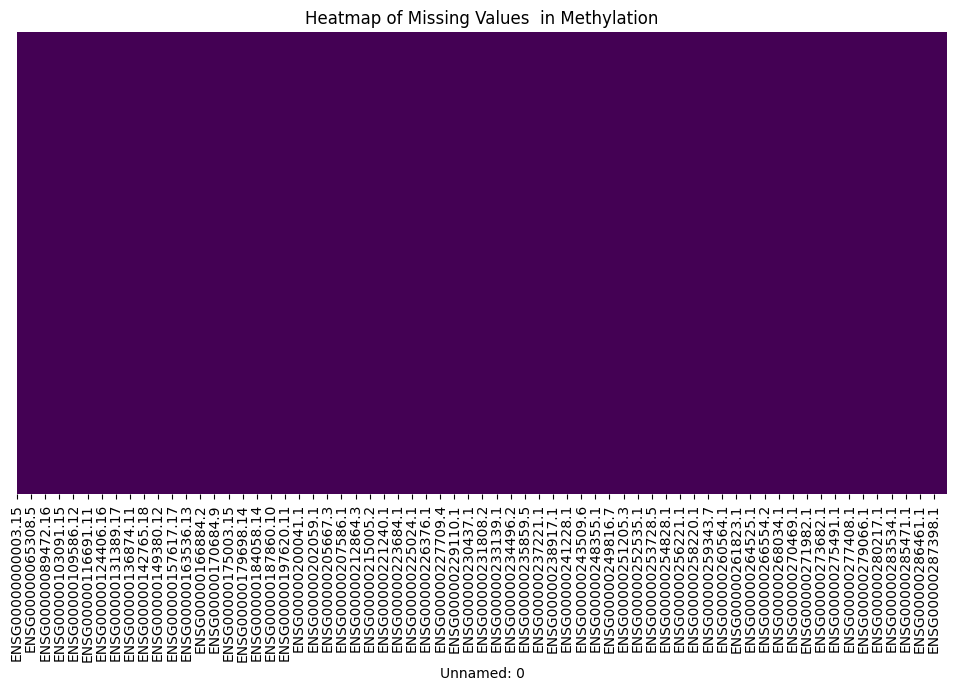

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of NaN values
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(X.isna(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Heatmap of Missing Values  in RNA_Seq")
plt.show()

In [94]:
X.isna().sum().sum()

0

In [95]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [96]:
X_norm[:2], y[:2]

(array([[1.83852654e-01, 2.64865581e-05, 3.47958880e-01, ...,
         0.00000000e+00, 1.96428571e-01, 1.82692308e-01],
        [1.28135727e-01, 0.00000000e+00, 6.34684148e-02, ...,
         0.00000000e+00, 8.92857143e-02, 7.69230769e-02]]),
 TCGA-EE-A2GU-06A-11R-A18T-07    1
 TCGA-EE-A29X-06A-11R-A18T-07    1
 Name: Sample_type, dtype: int64)

### Converting to tensors

In [97]:
X_tensor = torch.FloatTensor(X_norm)
y_tensor = torch.LongTensor(y.to_numpy())

In [99]:
# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

## Auto Encoder

In [100]:
# Hyperparameters
input_dim = X_tensor.shape[1]
latent_dim = 1000 # Bottleneck layer (selected features)
lr = 0.01
epochs = 10

# Initialize model, loss, optimizer
autoencoder = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

In [101]:
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=60660, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=1000, bias=True)
    (9): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=512, out_features=60660, bias=True)
    (7): Sigmoid()
  )
)

In [102]:
LOSS = []
# Train Autoencoder
autoencoder.train()
for epoch in range(epochs):
    for batch_X, _ in train_loader:  # Unsupervised (no labels needed)
        optimizer.zero_grad()
        reconstructed, latent = autoencoder(batch_X)
        loss = criterion(reconstructed, batch_X)
        LOSS.append(loss)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0463
Epoch [2/10], Loss: 0.0134
Epoch [3/10], Loss: 0.0130
Epoch [4/10], Loss: 0.0118
Epoch [5/10], Loss: 0.0102
Epoch [6/10], Loss: 0.0136
Epoch [7/10], Loss: 0.0120
Epoch [8/10], Loss: 0.0112
Epoch [9/10], Loss: 0.0097
Epoch [10/10], Loss: 0.0118


## Plot the loss curve

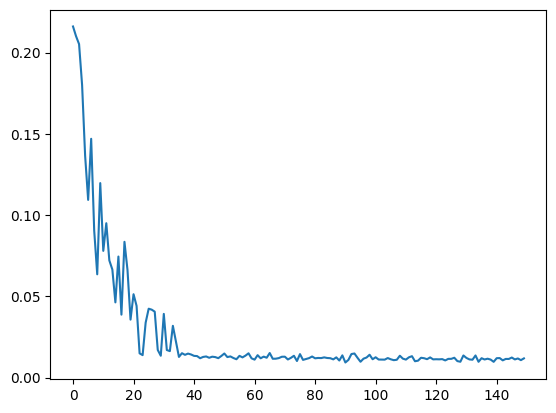

In [103]:
LOSS2 = []
for loss_tensor in LOSS:  # Assuming LOSS is a list of tensors

    loss_detached = loss_tensor.detach()
    LOSS2.append(loss_detached.numpy())

plt.plot(LOSS2)

### Encode RNA_seq data

In [104]:
# Extract latent features (selected features)
autoencoder.eval()
with torch.no_grad():
    X_latent = autoencoder.encoder(X_tensor)
    # X_test_latent = autoencoder.encoder(X_test_tensor)

In [105]:
df_rna4 = pd.DataFrame(X_latent)
df_rna4["Sample_type"] = y_tensor

In [107]:
df_rna4.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Sample_type
0,16.263203,0.327299,0.000000,19.769138,1.581432,1.269175,5.351663,5.258758,2.957267,2.212316,...,0.000000,12.406640,21.054991,4.604846,0.000000,0.000000,0.0,7.330823,13.886055,1
1,0.000000,4.739954,6.203649,0.000000,0.000000,4.964786,0.000000,0.000000,0.000000,0.000000,...,8.739338,0.000000,0.000000,0.000000,5.880862,4.467978,0.0,0.000000,0.000000,1
2,7.760679,8.664506,0.000000,5.489813,0.000000,12.020173,3.703621,0.000000,0.000000,0.000000,...,0.000000,3.664126,6.922591,0.000000,7.129135,0.000000,0.0,7.744801,0.000000,0
3,6.904083,0.000000,0.000000,9.955594,1.360067,0.510893,3.116695,3.584064,2.645634,0.595100,...,0.000000,8.214947,10.884281,4.840510,0.000000,0.000000,0.0,2.877843,7.540813,0
4,0.000000,6.457442,9.758096,0.000000,0.000000,3.386960,0.000000,0.000000,0.000000,0.000000,...,14.779585,0.000000,0.000000,0.000000,6.541218,9.668518,0.0,0.000000,0.000000,1


In [108]:
df_rna4.to_csv("/content/drive/MyDrive/Datasets/TCGA_SKCM/New_Data_18022025/rna_processed_data.csv", index = False)